In [3]:
import numpy as np
import tensorflow as tf
tf.enable_eager_execution()
import tensorflow_probability as tfp
from IPython.core.pylabtools import figsize
from matplotlib import pyplot as plt
tfd=tfp.distributions


### 2(a)

Text(0.5, 1.0, "Loss function for different $\\omega'$s")

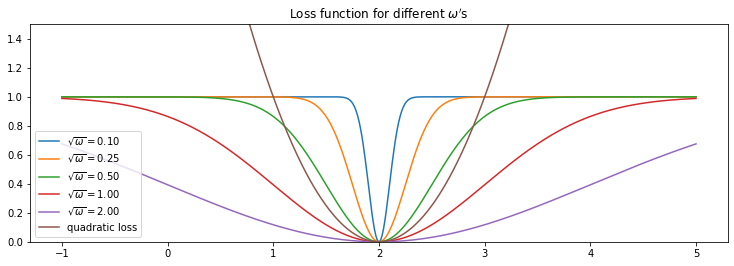

In [4]:
figsize(12.5, 4)
y=np.linspace(-1,5,500)
f=2
sqrt_w=np.array([0.1,0.25,0.5,1,2])
w=sqrt_w**2
def Loss(y,f,w):
    L=1-np.exp(-(y-f)**2/(2*w))
    return(L)
for i in range(len(w)):
    plt.plot(y,Loss(y,f,w[i]),label="$\sqrt{\omega} = %.2f$" % sqrt_w[i])
plt.plot(y,(y-f)**2,label="quadratic loss")
plt.ylim(0,1.5)
plt.legend()
plt.title('Loss function for different $\omega\'$s')


### 2(c)

Text(0.5, 1.0, "Risk function for different $\\omega'$s")

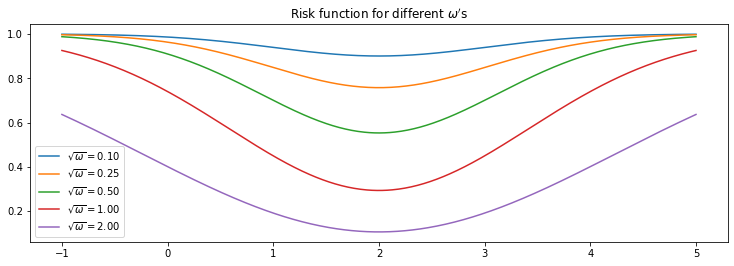

In [5]:
[m,v]=[2,1]
figsize(12.5, 4)
f=y
# directly calculate \rho(p,f)
def rho(f_,v_,w_,m_):
    q=v_+w_
    a=np.sqrt(w_/q)
    rho_=1-a*np.exp(-(m_-f_)**2/(2*q))
    return(rho_)
for i in range(len(w)):
    plt.plot(f,rho(f,v,w[i],m),label="$\sqrt{\omega} = %.2f$" % sqrt_w[i])
plt.legend()
plt.title('Risk function for different $\omega\'$s')

### 2(e)

Text(0.5, 1.0, 'distribution function for y when u=1')

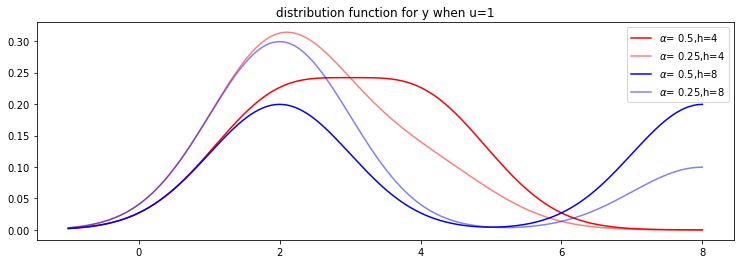

In [43]:
y=np.linspace(-1,8,500)
v=1
def p_star(y_,alpha_,m_,v_,h_,u_):
    norm1=tfd.Normal(m_,v_)
    norm2=tfd.Normal(h_,u_)
    return((1-alpha_)*norm1.prob(y_)+alpha_*norm2.prob(y_))
alpha_vec=[0.5,0.25]
h_vec=[4,8]
u_vec=[1,2]
u=u_vec[0]
figsize(12.5, 4)
for h in h_vec:
    for alpha in alpha_vec:
        plt.plot(y,p_star(y,alpha,m,v,h,u).numpy(),label=f"$α$= {alpha},h={h}",color=['red','blue'][int(h/4-1)],alpha=2*alpha)
plt.legend()
plt.title(f"distribution function for y when u={u}")
plt.figure()
u=u_vec[1]
for h in h_vec:
    for alpha in alpha_vec:
        plt.plot(y,p_star(y,alpha,m,v,h,u).numpy(),label=f"$α$= {alpha},h={h}",color=['red','blue'][int(h/4-1)],alpha=2*alpha)
plt.legend()
plt.title(f"distribution function for y when u={u}")

### 2(f)

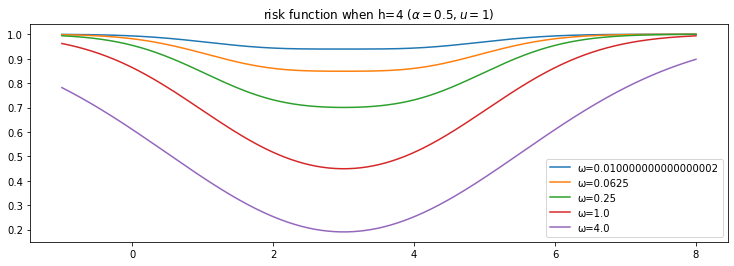

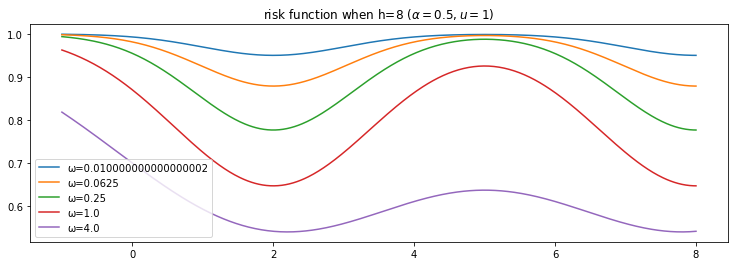

In [57]:
def risk(m_,alpha_,u_,v_,w_,f_,h_):
    q_=v_+w_
    a_=(1-alpha_)*np.sqrt(w_/q_)
    r_=u_+w_
    b_=alpha_*np.sqrt(w_/r_)
    rho_star=1-a_*np.exp(-(m_-f_)**2/(2*q_))-b_*np.exp(-(h_-f_)**2/(2*r_))
    return rho_star
f=y
figsize(12.5, 4)
alpha=0.5
for h in h_vec:
    u=u_vec[0]
    plt.figure()
    for omega in w:
        plt.plot(y,risk(m,alpha,u,v,omega,f,h),label=f"ω={omega}")
        plt.legend()
        plt.title(f"risk function when h={h} ($α={alpha},u={u}$)")

- The maxima and minima in risk function correspond to those in $p(y)$: similar to 2(b), the risk function is a linear function of the predictive distribution $p^*$ of $y$ evaluated at $f$. 
- Now the risk function may be multimodal when we use a mixture prior.
- The smaller $\omega$ is, the more "flat" the risk function become.

In [1]:
print('haha')

haha


In [3]:
print('2')

2
